In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
from topk_spade import *

# Example of running the algorithm to check if everything in topk_spade works

In [17]:
ds_positive=Dataset_Sequence('r-positive.txt')
ds_negative=Dataset_Sequence('r-negative.txt')

selected=topk_spade(ds_positive, ds_negative,10,printing=True)

[reuter] 2675 1421 4096
[mln] 1674 720 2394
[and] 1161 1217 2378
[and, reuter] 1147 1184 2331
[mln, reuter] 1625 693 2318
[dlr] 1262 896 2158
[dlr, reuter] 1211 842 2053
[ct] 2025 27 2052
[inc] 1163 880 2043
[for] 946 1074 2020


In [18]:
check_one_instance=selected[2378].pop()

In [19]:
check_one_instance

('and',)

# Machine Learning Performance Comparision

## 1- function for creating Pandas data frame

In [3]:
def check_subsequence(a,b):
    # This function check if b is a subsequence of a
    # a is the possible supersequence
    # b is the possible subsequence
    try:
        if len(b)<len(a):
            start=a.index(b[0])
            count=0
            for idx in range(len(a)-start):
                if count<len(b) and a[start+idx]==b[count]:
                    count+=1
            if count==len(b):
                return True
        return False
    except:
        return False

In [4]:
def Create_df(selected,positiveTrans,negativeTrans):
    seqList=[]
    for i in selected:
        seqs=list(selected[i])
        for seq in seqs:
            seqList.append(seq)
    frame = pd.DataFrame(columns = seqList+['label'])
    counter=0
    # Adding Positive Class
    for transaction in positiveTrans:
        seqObserved=[]
        for seq in seqList:
            seqObserved.append(int(check_subsequence(transaction,seq)))
        seqObserved.append(True)
        frame.loc[counter]=seqObserved
        counter+=1
    # Adding Negative Class
    for transaction in negativeTrans:
        seqObserved=[]
        for seq in seqList:
            seqObserved.append(int(check_subsequence(transaction,seq)))
        seqObserved.append(False)
        frame.loc[counter]=seqObserved
        counter+=1
    frame = frame.sample(frac=1).reset_index(drop=True)
    return frame

In [140]:
ds_positive=Dataset_Sequence('positive.txt')
ds_negative=Dataset_Sequence('negative.txt')

selected=topk_spade(ds_positive, ds_negative,6,printing=False)

In [141]:
frame=Create_df(selected,ds_positive.transactions,ds_negative.transactions)

In [142]:
frame

,"(C,)","(A,)","(C, A)","(B, A)","(A, A)","(B,)","(A, C, A)","(A, B)","(C, C, A)","(C, C)",...,"(B, B, A)","(B, A, B)","(C, B)","(C, B, B)","(C, B, A)","(A, B, B)","(A, B, A)","(A, C, C)","(A, C, C, A)",label
0,1,1,1,1,1,1,1,1,0,0,...,1,0,0,0,0,1,1,0,0,True
1,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,True
2,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,False
3,1,1,1,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,1,1,True
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,1,1,True
5,1,1,1,1,1,1,0,0,1,1,...,1,0,1,1,1,0,0,0,0,False
6,1,1,1,1,0,1,0,1,0,0,...,1,1,1,1,1,1,0,0,0,False


### 1-1 Running Experiment on Machine Learning (Example) (Logistic Regression and Decision Tree)

#### 1-1-1 Protein Dataset with k=10

In [78]:
ds_positive=Dataset_Sequence('p-positive.txt')
ds_negative=Dataset_Sequence('p-negative.txt')

selected=topk_spade(ds_positive, ds_negative,10,printing=False)
frame=Create_df(selected,ds_positive.transactions,ds_negative.transactions)

In [79]:
frame.sample(5)

,"(G,)","(T,)","(A,)","(L,)","(E,)","(P,)","(S,)","(V,)","(Y,)","(R,)","(R, S)",label
1,1,0,0,1,1,1,0,1,1,1,0,True
509,0,0,1,0,0,1,1,0,0,1,1,False
620,0,0,0,1,1,1,0,0,1,0,0,True
26,1,0,1,1,1,1,0,1,1,1,0,True
414,0,1,1,0,1,0,1,1,1,1,1,False


In [80]:
 X_train, X_test, y_train, y_test = train_test_split(frame.iloc[:,:-1], frame.iloc[:,-1], test_size=0.3, random_state=42)

##### Logistic Regression

In [104]:
lr = LogisticRegression(random_state=0).fit(X_train, y_train.astype(int))
print('Logistic Regression:')
print('\tTraining Accuracy:',lr.score(X_train, y_train.astype(int)))
print('\tTest Accuracy:',lr.score(X_test, y_test.astype(int)))

Logistic Regression:
	Training Accuracy: 0.9074074074074074
	Test Accuracy: 0.9186602870813397


#### Decision Tree

In [105]:
dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train.astype(int))
print('Decision Tree:')
print('\tTraining Accuracy:',dt.score(X_train, y_train.astype(int)))
print('\tTest Accuracy:',dt.score(X_test, y_test.astype(int)))

Decision Tree:
	Training Accuracy: 0.9526748971193416
	Test Accuracy: 0.8995215311004785


#### 1-1-2 Reuters Dataset with k=10

In [108]:
ds_positive=Dataset_Sequence('r-positive.txt')
ds_negative=Dataset_Sequence('r-negative.txt')

selected=topk_spade(ds_positive, ds_negative,10,printing=False)
frame=Create_df(selected,ds_positive.transactions,ds_negative.transactions)

In [109]:
frame.sample(5)

,"(and,)","(for,)","(inc,)","(ct,)","(mln,)","(dlr,)","(reuter,)","(mln, reuter)","(and, reuter)","(dlr, reuter)",label
271,1,1,1,0,1,1,1,1,1,1,False
72,1,0,0,1,1,1,1,1,1,1,True
1278,1,1,0,0,1,1,1,1,1,1,False
4078,0,0,1,0,1,0,1,1,0,0,False
359,1,1,1,0,1,1,1,1,1,1,False


In [110]:
 X_train, X_test, y_train, y_test = train_test_split(frame.iloc[:,:-1], frame.iloc[:,-1], test_size=0.3, random_state=42)

##### Logistic Regression

In [111]:
lr = LogisticRegression(random_state=0).fit(X_train, y_train.astype(int))
print('Logistic Regression:')
print('\tTraining Accuracy:',lr.score(X_train, y_train.astype(int)))
print('\tTest Accuracy:',lr.score(X_test, y_test.astype(int)))

Logistic Regression:
	Training Accuracy: 0.854287556415216
	Test Accuracy: 0.8360902255639098


#### Decision Tree

In [112]:
dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train.astype(int))
print('Decision Tree:')
print('\tTraining Accuracy:',dt.score(X_train, y_train.astype(int)))
print('\tTest Accuracy:',dt.score(X_test, y_test.astype(int)))

Decision Tree:
	Training Accuracy: 0.8629916183107672
	Test Accuracy: 0.8473684210526315


## 1-2 Comparing the performance of the algorithm with different k

### Protein Dataset

Current k:  5
Current k:  10
Current k:  20
Current k:  30
Current k:  40
Current k:  50
Current k:  60
Current k:  70
Current k:  80
Current k:  90
Current k:  100


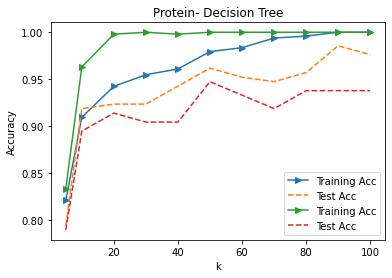

In [134]:
ds_positive=Dataset_Sequence('p-positive.txt')
ds_negative=Dataset_Sequence('p-negative.txt')
lr_train_acc=[]
lr_test_acc=[]
dt_train_acc=[]
dt_test_acc=[]

KS=[5,10,20,30,40,50,60,70,80,90,100]
for k in KS:
    print('Current k: ',k)
    selected=topk_spade(ds_positive, ds_negative,k,printing=False) # finding top-k
    frame=Create_df(selected,ds_positive.transactions,ds_negative.transactions)# creating the dataframe
    X_train, X_test, y_train, y_test = train_test_split(frame.iloc[:,:-1], frame.iloc[:,-1], test_size=0.3, random_state=42)
    """
    Logistic Regression
    """
    lr = LogisticRegression(random_state=0).fit(X_train, y_train.astype(int))
    lr_train_acc.append(lr.score(X_train, y_train.astype(int)))
    lr_test_acc.append(lr.score(X_test, y_test.astype(int)))
        
    """
    Decision Tree
    """
    dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train.astype(int))
    dt_train_acc.append(dt.score(X_train, y_train.astype(int)))
    dt_test_acc.append(dt.score(X_test, y_test.astype(int)))

### Plotting

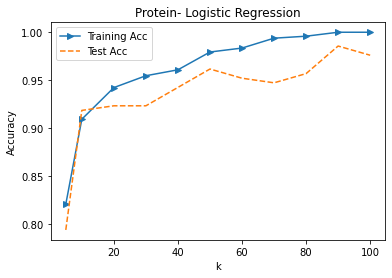

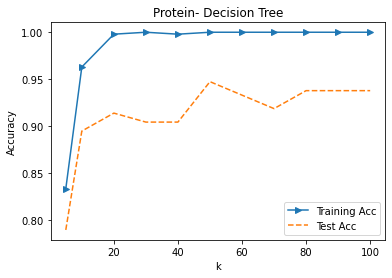

In [136]:
## Plotting
plt.figure(1)
plt.plot(KS,lr_train_acc,'->',label='Training Acc')
plt.plot(KS,lr_test_acc,'--',label='Test Acc')
plt.title('Protein- Logistic Regression')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Protein-supp-Logi.png')

plt.figure(2)
plt.plot(KS,dt_train_acc,'->',label='Training Acc')
plt.plot(KS,dt_test_acc,'--',label='Test Acc')
plt.title('Protein- Decision Tree')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Protein-supp-DecTr.png')

### Reuters Dataset

In [137]:
ds_positive=Dataset_Sequence('r-positive.txt')
ds_negative=Dataset_Sequence('r-negative.txt')
lr_train_acc=[]
lr_test_acc=[]
dt_train_acc=[]
dt_test_acc=[]

KS=[5,10,20,30,40,50,60,70,80,90,100]
for k in KS:
    print('Current k: ',k)
    selected=topk_spade(ds_positive, ds_negative,k,printing=False) # finding top-k
    frame=Create_df(selected,ds_positive.transactions,ds_negative.transactions)# creating the dataframe
    X_train, X_test, y_train, y_test = train_test_split(frame.iloc[:,:-1], frame.iloc[:,-1], test_size=0.3, random_state=42)
    """
    Logistic Regression
    """
    lr = LogisticRegression(random_state=0).fit(X_train, y_train.astype(int))
    lr_train_acc.append(lr.score(X_train, y_train.astype(int)))
    lr_test_acc.append(lr.score(X_test, y_test.astype(int)))
        
    """
    Decision Tree
    """
    dt = DecisionTreeClassifier(random_state=0).fit(X_train, y_train.astype(int))
    dt_train_acc.append(dt.score(X_train, y_train.astype(int)))
    dt_test_acc.append(dt.score(X_test, y_test.astype(int)))

Current k:  5
Current k:  10
Current k:  20
Current k:  30
Current k:  40
Current k:  50
Current k:  60
Current k:  70
Current k:  80
Current k:  90
Current k:  100


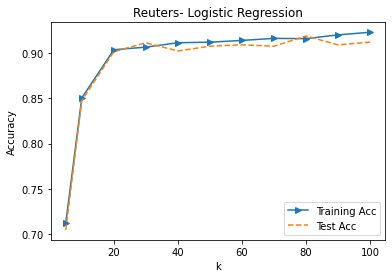

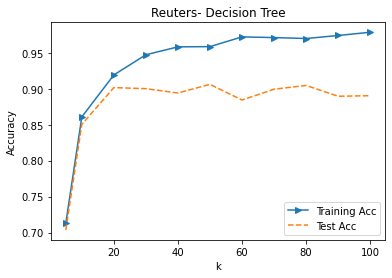

In [138]:
## Plotting
plt.figure(1)
plt.plot(KS,lr_train_acc,'->',label='Training Acc')
plt.plot(KS,lr_test_acc,'--',label='Test Acc')
plt.title('Reuters- Logistic Regression')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Reuters-supp-Logi.png')

plt.figure(2)
plt.plot(KS,dt_train_acc,'->',label='Training Acc')
plt.plot(KS,dt_test_acc,'--',label='Test Acc')
plt.title('Reuters- Decision Tree')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Reuters-supp-DecTr.png')